In [284]:
from environment.TheoreticalMarket import *
import numpy as np

tm = TheoreticalMarket(beta0 = 30, beta1 = -1.1, beta2 = -2, a = 0.1, ref_p = 1.5)
# tm = TheoreticalMarket(beta0 = 30, beta1 = -1.1, beta2 = -2, a = 0.1, ref_p = 3.9)
# tm = TheoreticalMarket(beta0 = 300, beta1 = -1.1, beta2 = -20, a = 0.05, ref_p = 10)

In [285]:
def dev_calc(x, tm):
    return tm.compute_opt_dev(x) if tm.compute_opt_dev(x) < x else x

def get_nash_eps_curve(ref_price, beta0 = 30, beta1 = -1.1, beta2 = -2, a = 0.1):
    prices = np.linspace(0.01, 10, 50)
    tm = TheoreticalMarket(beta0, beta1, beta2, a, ref_p = ref_price)
    devs = [dev_calc(x, tm) for x in prices]
    demand = [tm.demand_func(x) for x in prices]
    return prices, devs, demand

In [286]:
ref_prices = np.linspace(0.01, 10, 50)
# ref_prices = np.linspace(0.01, 10, 50)

# Config 1
# beta0 = 25
# beta1 = -0.9
# beta2 = -1.1
# a = 0.1

# Config 2
# beta0 = 31
# beta1 = -2.9
# beta2 = -3.1
# a = 0.1

# Config 3
beta0 = 15
beta1 = -0.05
beta2 = -3.1
a = 0.1

prices = np.array([get_nash_eps_curve(r, beta0, beta1, beta2, a)[0] for r in ref_prices])
devs = np.array([get_nash_eps_curve(r, beta0, beta1, beta2, a)[1] for r in ref_prices])
demand = np.array([get_nash_eps_curve(r, beta0, beta1, beta2, a)[2] for r in ref_prices])

/home/larkin/code/dqn-marl/environment/TheoreticalMarket.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  return (self.gamma / self.demand_func(x)) - (1 / x)
/home/larkin/code/dqn-marl/environment/TheoreticalMarket.py:36: RuntimeWarning: divide by zero encountered in double_scalars
  return self.gamma / (self.demand_func(x) * x )
/home/larkin/code/dqn-marl/environment/TheoreticalMarket.py:41: RuntimeWarning: invalid value encountered in double_scalars
  square_term = np.max([0, np.power(c1, 2) - c1 + 4*(c2 -1)*c2 - 2*c2])
/home/larkin/code/dqn-marl/.dqn-cpu-env/lib/python3.8/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


In [287]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

y = ref_prices
x = prices[0]
X, Y = np.meshgrid(x, y) 
z = devs

In [288]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, devs, 999, cmap='viridis')
# ax.set_xlabel('Market Price')
# ax.set_ylabel('Reference Price')
# ax.set_zlabel('Epsilon Deviation')

Text(0.5,0.92,'Epsilon Deviation w.r.t. Market & Reference Price')

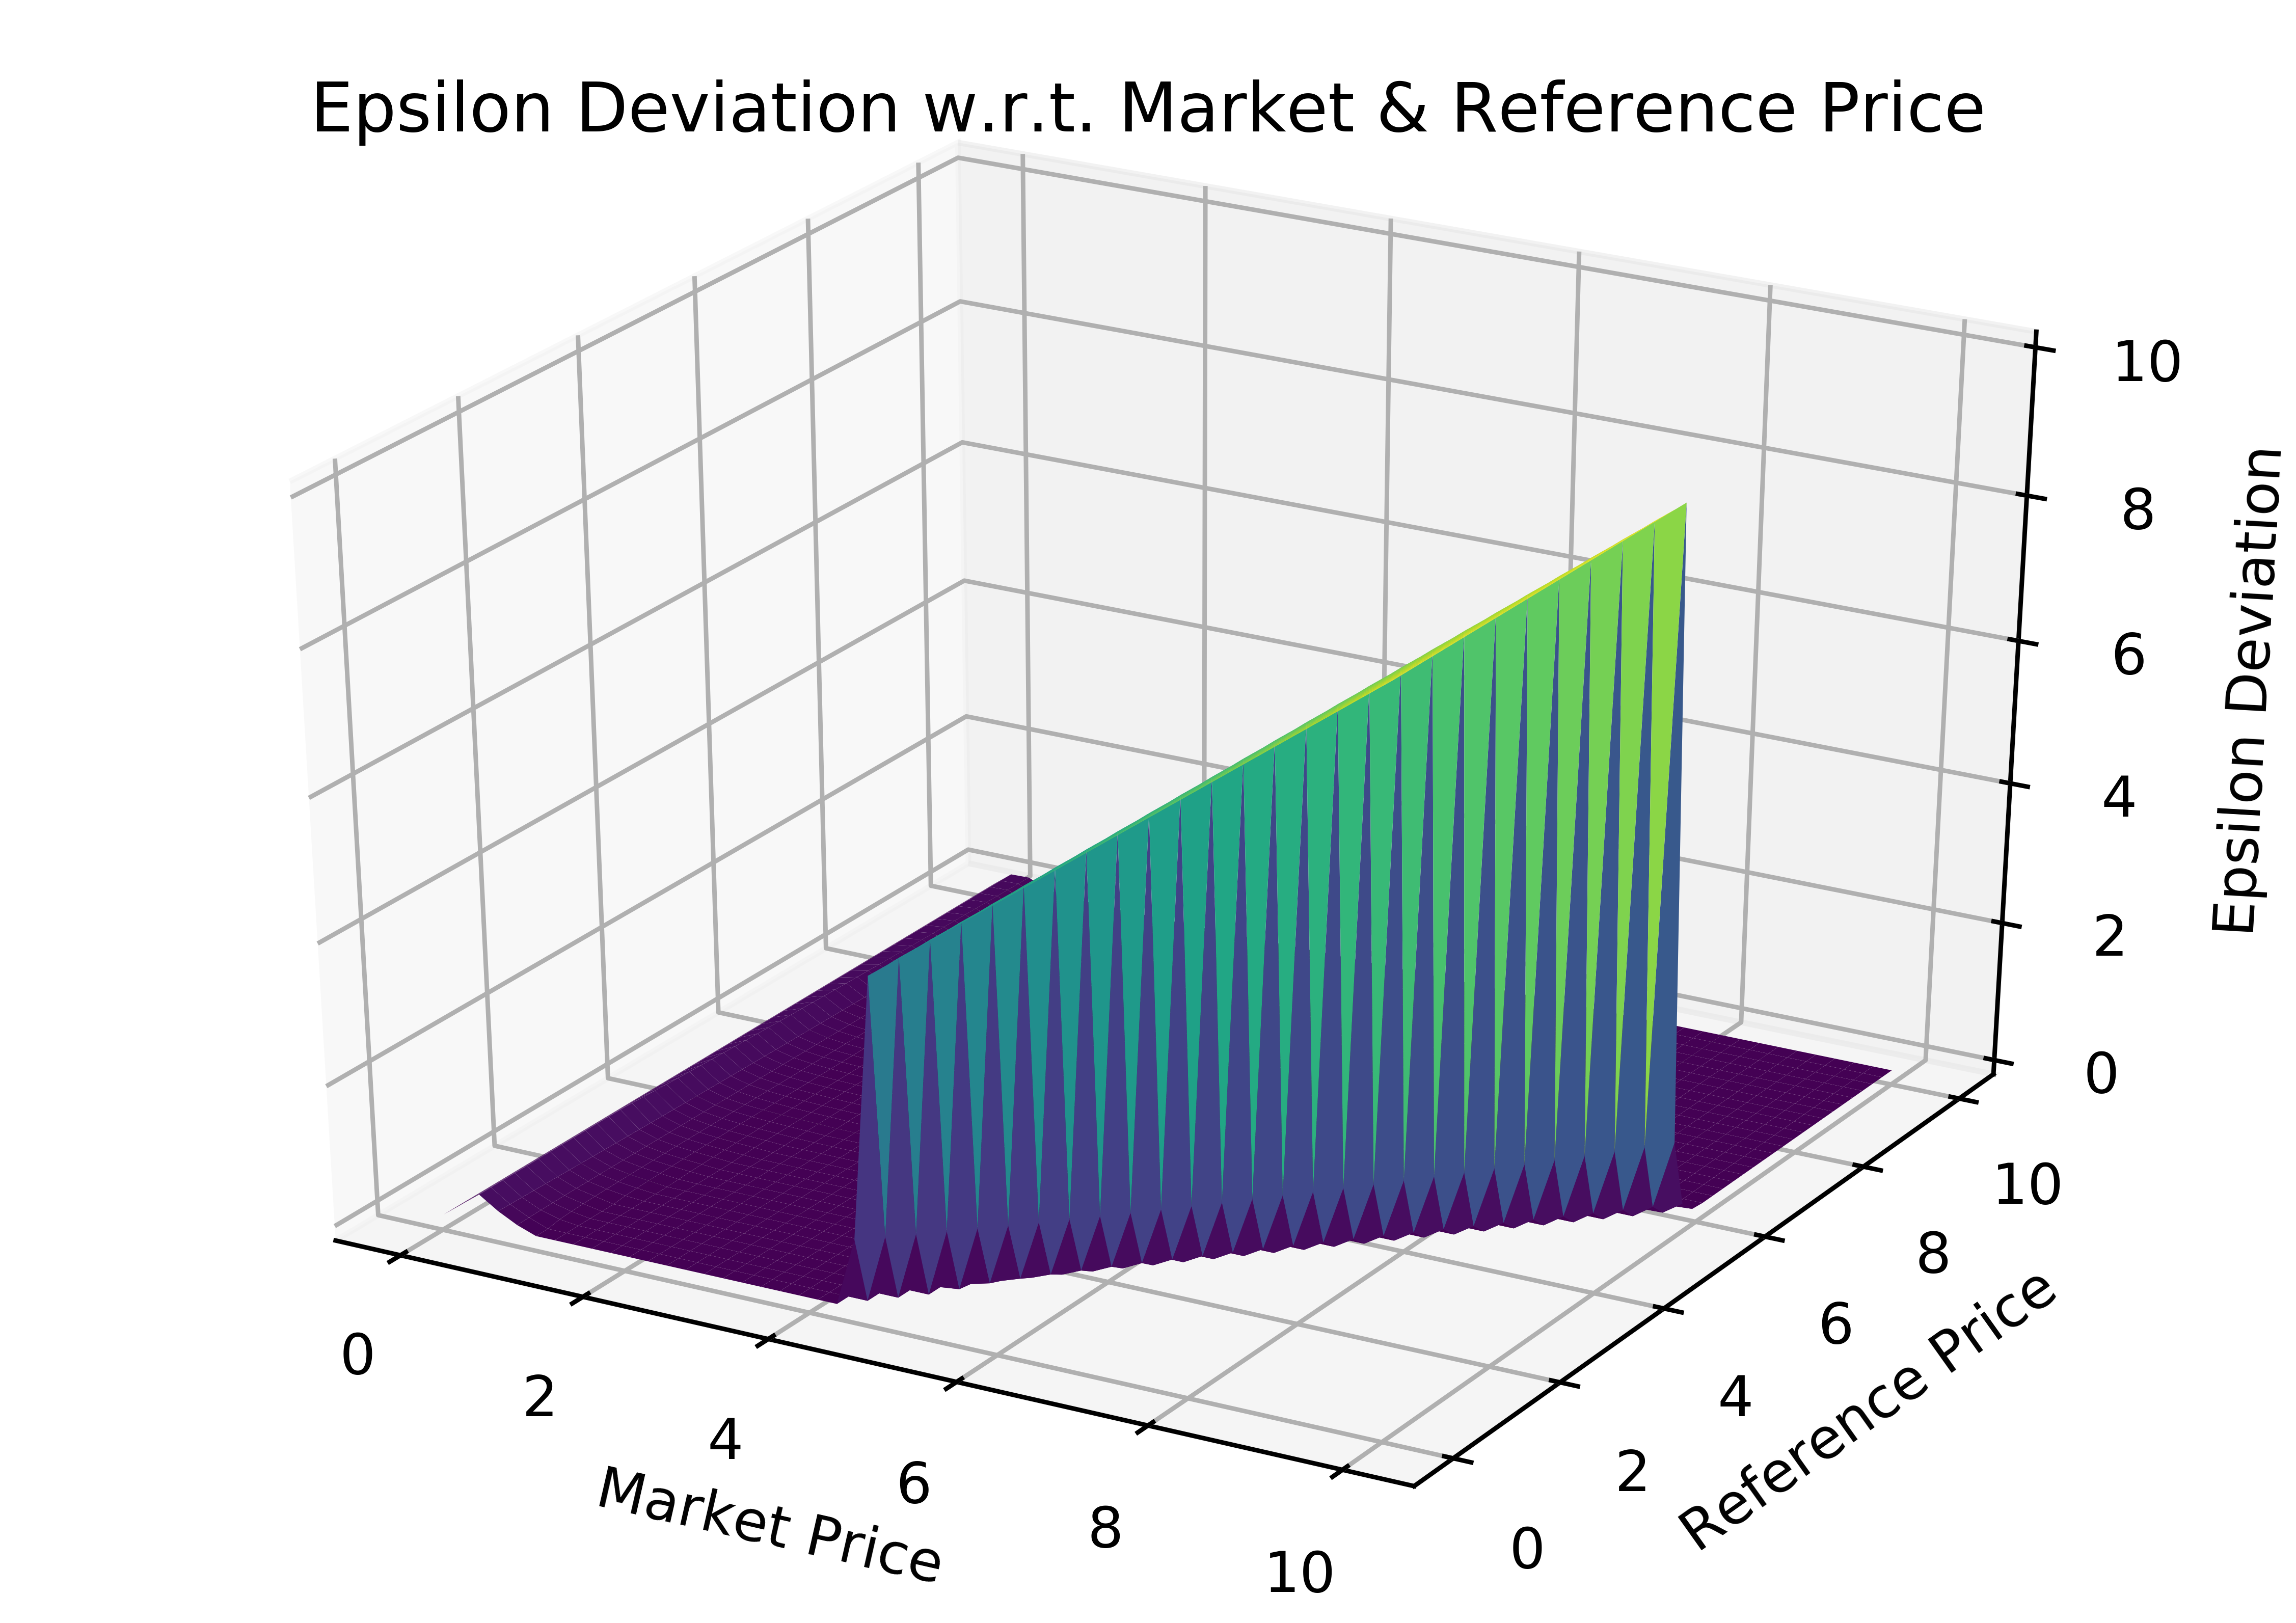

In [289]:
fig = plt.figure(figsize = (7, 5), dpi = 800)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, devs, cmap='viridis', edgecolor='none')
ax.set_xlabel('Market Price')
ax.set_ylabel('Reference Price')
ax.set_zlabel('Epsilon Deviation')
ax.set_title('Epsilon Deviation w.r.t. Market & Reference Price')

In [290]:
# Get epsilon range
# X market price
# Y ref price, all same
# z eps
# Y[44]

def get_eps_curves(ref_price, ref_price_mesh, market_prices, devs):
    idx = (np.abs(ref_price_mesh[:, 0] - ref_price)).argmin()
    closest_ref_price = ref_price_mesh[idx, 0]
    nash_eps_curve = devs[idx]
    return market_prices[idx], nash_eps_curve, closest_ref_price

def get_eps0_range(ref_price, ref_price_mesh, market_prices, devs, eps_lim = 0.0001):
    market_prices, nash_eps_curve, _ = get_eps_curves(ref_price, ref_price_mesh, market_prices, devs)
    eps_idx = np.where(nash_eps_curve < eps_lim)
    return np.min(market_prices[eps_idx]), np.max(market_prices[eps_idx])

min_eps_price, max_eps_price = get_eps0_range(9.9, Y, X, z)
min_eps_price, max_eps_price

(4.6991836734693875, 10.0)

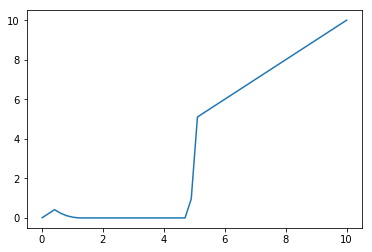

In [298]:
market_prices, nash_eps_curve, _ = get_eps_curves(0.5, Y, X, z)
plt.plot(market_prices, nash_eps_curve)

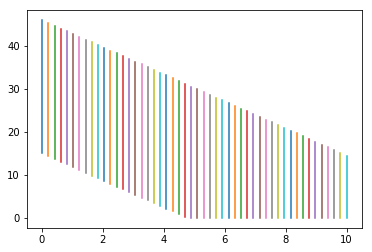

In [292]:
plt.plot(prices, np.array(demand))

In [293]:
devs

array([[ 0.01      ,  0.21387755,  0.4177551 , ...,  9.5922449 ,
         9.79612245, 10.        ],
       [ 0.01      ,  0.21387755,  0.4177551 , ...,  9.5922449 ,
         9.79612245, 10.        ],
       [ 0.01      ,  0.21387755,  0.4177551 , ...,  9.5922449 ,
         9.79612245, 10.        ],
       ...,
       [ 0.01      ,  0.21387755,  0.22622183, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01      ,  0.21387755,  0.22326158, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01      ,  0.21387755,  0.22037757, ...,  0.        ,
         0.        ,  0.        ]])

In [294]:
dev_price_list = []
dev_price_arr = np.array([devs, prices])
for i in range(dev_price_arr.shape[1]):
    dev_price_list.append(dev_price_arr[:,i])

In [295]:
dev_price_list

[array([[ 0.01      ,  0.21387755,  0.4177551 ,  0.2384428 ,  0.09837037,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.97672299,  4.69918367,  4.90306122,
          5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
          6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
          7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
          8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
          9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ],
        [ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
          1.02938776,  1.23326531,  1.43714286,  1.64102041,  1.84489796,
          2.04877551,  2.25265306,  2.45653061,  2.66040816,  2.86428571,
          3.06816327,  3.27204082,  3

In [296]:
updated_prices = list(prices + np.array(devs))
updated_profits = [tm.compute_profit( x[1] - x[0], np.ones(3)*x[1]) for x in dev_price_list ]
profits = [tm.compute_profit(x, np.ones(3)*x ) for x in prices]

plt.plot(prices[50:], profits[50:])
plt.plot(prices[50:], updated_profits[50:])


ValueError: operands could not be broadcast together with shapes (3,) (50,) 

In [ ]:
np.array(updated_profits) - np.array(profits)

array([-2.74141594e+23, -4.63528161e+03, -7.82593933e+01, -1.75090036e+01,
       -7.56729407e+00, -4.27710298e+00, -2.77992397e+00, -1.96595765e+00,
       -1.47076978e+00, -1.14537212e+00, -9.19222461e-01, -7.55217034e-01,
       -6.32236611e-01, -5.37498746e-01, -4.62877241e-01, -4.02994160e-01,
       -3.54169148e-01, -3.13811159e-01, -2.80051162e-01, -2.51512213e-01,
       -2.27160996e-01, -2.06209311e-01, -1.88047140e-01, -1.72196182e-01,
       -1.58276993e-01, -1.45985335e-01, -1.35074899e-01, -1.25344505e-01,
       -1.16628490e-01, -1.08789412e-01, -1.01712455e-01, -9.53010788e-02,
       -8.94736306e-02, -8.41606591e-02, -7.93027845e-02, -7.48489892e-02,
       -7.07552388e-02, -6.69833623e-02, -6.35001362e-02, -6.02765325e-02,
       -5.72870961e-02, -5.45094286e-02, -5.19237566e-02, -4.95125701e-02,
       -4.72603171e-02, -4.51531463e-02, -4.31786878e-02, -4.13258664e-02,
       -3.95847418e-02, -3.79463713e-02, -3.64026918e-02, -3.49464175e-02,
       -3.35709513e-02, -

In [ ]:
updated_profits

[-2.7414159384083553e+23,
 -4635.252588435332,
 -78.21041994312003,
 -17.440073107675204,
 -7.478405394580393,
 -4.168254843029138,
 -2.651114751384209,
 -1.8171854462694494,
 -1.3020323747203586,
 -0.9566669940302822,
 -0.7105467893461445,
 -0.5265676840210561,
 -0.3836101387721829,
 -0.2688913949593848,
 -0.17428494152008192,
 -0.09441252529007683,
 -0.025593471883033642,
 0.03476358313230732,
 0.08852799557297127,
 0.13707703214175804,
 0.1814443371046131,
 0.22241843860895677,
 0.2606096867855263,
 0.29649671480020956,
 0.33045930368731313,
 0.3628020290652886,
 0.39377153932462833,
 0.42356935836445164,
 0.45236149407645676,
 0.480285734460677,
 0.5074572478690961,
 0.5339729245223512,
 0.559914773362069,
 0.5853526026274765,
 0.6103461521219797,
 0.6349468019983783,
 0.6591989517434872,
 0.6831411403123594,
 0.7068069616090521,
 0.7302258170477397,
 0.7534235375749608,
 0.7764229004567604,
 0.7992440607378708,
 0.821904913134567,
 0.8444213969161776,
 0.8668077538334451,
 0.88907

In [ ]:
profits

[0.009060943961690247,
 0.029016945112705004,
 0.04897337046771706,
 0.0689305137955987,
 0.08888867062345301,
 0.1088481382585688,
 0.1288092158106633,
 0.14877220421441753,
 0.16873740625230912,
 0.18870512657774688,
 0.20867567173851176,
 0.22864935020050992,
 0.24862647237184185,
 0.2686073506271931,
 0.28859229933255237,
 0.30858163487025997,
 0.3285756756643956,
 0.3485747422065068,
 0.36857915708168687,
 0.38858924499500636,
 0.4086053327983034,
 0.42862774951734084,
 0.4486568263793329,
 0.4686928968408506,
 0.48873629661611007,
 0.508787363705651,
 0.5288464384254113,
 0.5489138634362034,
 0.5689899837736021,
 0.5890751468782461,
 0.6091697026265648,
 0.6292740033619335,
 0.6493884039262664,
 0.6695132616920542,
 0.6896489365948535,
 0.7097957911662356,
 0.7299541905672031,
 0.7501245026220807,
 0.7703070978528896,
 0.7905023495142128,
 0.8107106336285611,
 0.8309323290222458,
 0.8511678173617688,
 0.8714174831907385,
 0.8916817139673202,
 0.9119609001022294,
 0.93225543499727

In [ ]:
-(tm.beta0 - tm.beta2*tm.ref_p) / (tm.beta1 + tm.beta2)

10.64516129032258

In [ ]:
tm.demand_func(8.701)

6.026899999999998

In [ ]:
(tm.beta2 * tm.ref_p - tm.beta0)/ (2*(tm.beta1 + tm.beta2)) 

5.32258064516129

In [ ]:
tm.demand_func(8.75)

5.875

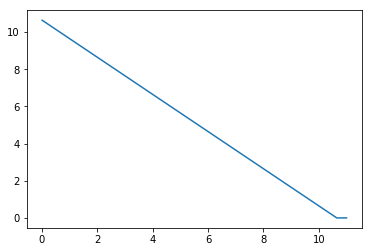

In [ ]:
plt.plot(prices, np.array(demand) / tm.gamma)

In [ ]:
# tm.compute_opt_dev(8.21)

tm.demand_func(5) / tm.gamma

5.64516129032258

In [ ]:
devs[-40]

0.07873036042426104

In [ ]:
tm.compute_profit(0.01, np.array([0.01, 0.02, 0.02]))

0.00906396339373952

In [ ]:
tm.get_c2(0.01)

12.171659664690408

In [ ]:
tm.demand_func(0.01)

25.469